In [110]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [99]:
key = '###'

In [112]:
 def search_images_bing(key, term, max_images: int = 100, **kwargs):    
     params = {'q':term, 'count':max_images}
     headers = {"Ocp-Apim-Subscription-Key":key}
     search_url = "https://api.bing.microsoft.com/v7.0/images/search"
     response = requests.get(search_url, headers=headers, params=params)
     response.raise_for_status()
     search_results = response.json()    
     return L(search_results['value'])

In [113]:
results = search_images_bing(key, 'beer')
ims = results.attrgot('contentUrl')

In [114]:
drink_types = 'beer','wine','cocktail'
path = Path('drinks')

In [115]:
#if not path.exists():
#    path.mkdir()
for o in drink_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, o)
    download_images(dest, urls=results.attrgot('contentUrl'))

In [116]:
fns = get_image_files(path)
fns

(#341) [Path('drinks/cocktail/00000047.jpg'),Path('drinks/cocktail/00000055.jpg'),Path('drinks/cocktail/00000036.jpg'),Path('drinks/cocktail/00000030.jpg'),Path('drinks/cocktail/00000097.jpg'),Path('drinks/cocktail/00000029.jpg'),Path('drinks/cocktail/00000091.jpg'),Path('drinks/cocktail/00000093.jpg'),Path('drinks/cocktail/00000090.jpg'),Path('drinks/cocktail/00000035.jpg')...]

In [117]:
failed = verify_images(fns)
failed

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(


(#6) [Path('drinks/wine/00000062.jpg'),Path('drinks/wine/00000045.jpg'),Path('drinks/wine/00000070.jpg'),Path('drinks/wine/00000025.jpg'),Path('drinks/beer/00000092.png'),Path('drinks/beer/00000057.jpg')]

In [118]:
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

In [119]:
drinks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [120]:
drinks = drinks.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = drinks.dataloaders(path)

In [121]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.586568,0.460298,0.179104,00:11


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.575191,0.333154,0.104478,00:11
1,0.519494,0.261942,0.089552,00:10
2,0.401347,0.249177,0.074627,00:11
3,0.328680,0.253657,0.089552,00:10


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/li

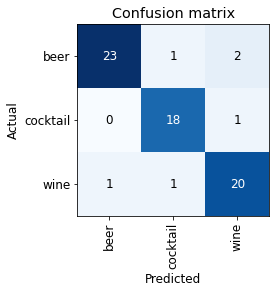

In [122]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

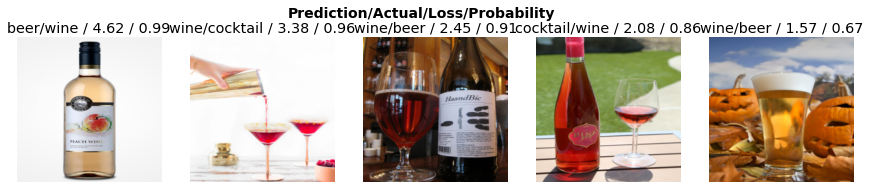

In [80]:
interp.plot_top_losses(5, nrows=1)

In [123]:
#Shows images with highest loss
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(


In [95]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [96]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 1.
Original Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 110, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/basics.py", line 211, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 125, in do_item
    try: return self.after_item(self.create_item(s))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/load.py", line 131, in create_item
    def create_item(self, s):  return next(self.it) if s is None else self.dataset[s]
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 314, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 314, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 280, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/data/core.py", line 242, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 198, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastcore/dispatch.py", line 117, in __call__
    return f(*args, **kwargs)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py", line 2891, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/notebooks/drinks/wine/00000056.jpg'


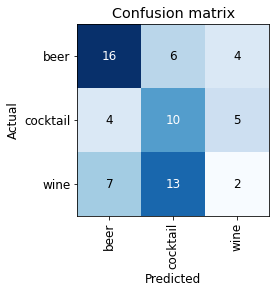

In [97]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [124]:
learn.export()

In [125]:
#check export file exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [126]:
learn_inf = load_learner(path/'export.pkl')

In [154]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [155]:
btn_upload = widgets.FileUpload()

In [156]:
VBox([widgets.Label('Give me a picture of your drink!'), 
      btn_upload, btn_run, out_pl, lbl_pred])